# Lyric Generator Model 

In this self-developed project, my aim was to generate lyric by using lyrics of all discography of a given performer. I developed my model using Bob Dylan lyrics but it is open for new trials. 

At first step, I parsed lyrics from a web page via beautifulsoup package and then cleaned as well as prepared them for model development. 
After that I created a bidirectional LSTM model with a couple of layers, then trained it with a hundred iteration. Eventually, I provide initial words for prediction to the trained model and it provides prodicted a hundred more words addition to my initial words. 

***As a note, I parsed lyric data from a randomly found website https://sarki.alternatifim.com/ so it may have some rights for commercial use!***

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import re, warnings, flask, joblib
from tensorflow import keras


In [2]:
# this step was required for my laptop to prevent GPU extension error, if you are planning to use multiple GPU support please skip this code snippet (you may require to change your settings)

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from unidecode import unidecode

In [8]:

url = 'https://sarki.alternatifim.com/sarkici/'


hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
         'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
         'Referer': 'https://cssspritegenerator.com',
         'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
         'Accept-Encoding': 'none',
         'Accept-Language': 'en-US,en;q=0.8',
         'Connection': 'keep-alive'}


In [9]:
ticker = input('Please write a singer name to produce lyrics :')

w_url = url + ticker

response = urlopen(Request(url = w_url, headers=hdr))
lyric_table = BeautifulSoup(response, 'html')
song_names = []
for row in lyric_table.findAll('li'):
    song_names.append(unidecode(row.a.text))

Please write a singer name to produce lyrics : bob-dylan


In [10]:
song_names

['A Fool Such As I',
 'All Along The Watchtower',
 'Arthur McBride',
 'As I Went Out One Morning',
 'Baby, Let Me Follow You Down',
 'Ballad In Plain D',
 'Ballad Of A Thin Man',
 'Big Yellow Taxi',
 'Black Diamond Bay',
 'Blackjack Davey',
 'Blowing In The Wind',
 "Bob Dylan's 115th Dream",
 'Brownsville Girl',
 'Buckets Of Rain',
 "Can't Help Falling In Love",
 'Canadee-I-O',
 'Chimes Of Freedom',
 'Clean-Cut Kid',
 'Dark Eyes',
 'Dear Landlord',
 'Death Is Not The End',
 'Desolation Row',
 'Diamond Joe',
 "Don't Fall Apart On Me Tonight",
 'Down Along The Cove',
 "Drifter's Escape",
 "Driftin' Too Far From Shore",
 'Emotionally Yours',
 "Fixin' To Die Blues",
 'Forever Young',
 'Frankie and Albert',
 'Freight Train Blues',
 "Froggie Went A Courtin'",
 'From A Buick 6',
 'Gates Of Eden',
 'Gospel Plow',
 'Got My Mind Made Up',
 'Had A Dream About You, Baby',
 'Hard Times',
 'Highway 51 Blues',
 "House Of The Risin' Sun",
 'Hurricane',
 'I Am A Lonesome Hobo',
 'I And I',
 "I Don't Be

In [12]:
for idx,name in enumerate(song_names):
    song_names[idx] = re.sub(r'\W+',  "-", name.lower())
    if song_names[idx].endswith('-'):
        song_names[idx] = song_names[idx][:-1]  
if len(ticker.split('-')) >1:
    print('Analysed', str(ticker).split('-')[0].upper(), str(ticker).split('-')[1].upper(), 'songs : ')  
else: 
    print('Analysed', str(ticker).split('-')[0].upper(), 'songs : ')  

for song in song_names:
    print(song)

Analysed BOB DYLAN songs : 
a-fool-such-as-i
all-along-the-watchtower
arthur-mcbride
as-i-went-out-one-morning
baby-let-me-follow-you-down
ballad-in-plain-d
ballad-of-a-thin-man
big-yellow-taxi
black-diamond-bay
blackjack-davey
blowing-in-the-wind
bob-dylan-s-115th-dream
brownsville-girl
buckets-of-rain
can-t-help-falling-in-love
canadee-i-o
chimes-of-freedom
clean-cut-kid
dark-eyes
dear-landlord
death-is-not-the-end
desolation-row
diamond-joe
don-t-fall-apart-on-me-tonight
down-along-the-cove
drifter-s-escape
driftin-too-far-from-shore
emotionally-yours
fixin-to-die-blues
forever-young
frankie-and-albert
freight-train-blues
froggie-went-a-courtin
from-a-buick-6
gates-of-eden
gospel-plow
got-my-mind-made-up
had-a-dream-about-you-baby
hard-times
highway-51-blues
house-of-the-risin-sun
hurricane
i-am-a-lonesome-hobo
i-and-i
i-don-t-believe-you
i-dreamed-i-saw-st-augustine
i-pity-the-poor-immigrant
i-shall-be-free-no-10
i-ll-be-your-baby-tonight
i-ll-remember-you


In [13]:
all_lyrics = []


for songname in song_names:
    w_url = url + ticker + '/' + songname
    response = urlopen(Request(url = w_url, headers=hdr))
    lyric = BeautifulSoup(response, 'html')
    lyr = []

    for div in lyric.findAll('br'):
        lyr.append(div.next_sibling)

    lyr = [l for l in lyr if not str(l).startswith('\n') and not str(l).startswith('<div') and l != None and 'href=' not in str(l)]
    lyr = [str(l).split('\n')[0] for l in lyr]
    if len(lyr) > 2:
        lyr = [l.strip().lower() for l in lyr]
        for l in lyr:
            all_lyrics.append(l)

            
print("First 20 lines of lyrics :")
for i in range(0,20):
    print(all_lyrics[i])   

print('\n')
print('Total length of lyrics', len(all_lyrics))



First 20 lines of lyrics :
pardon me if i'm sentimental, came to say goodbye
don't be angry, don't be angry with me, should i cry
when you are gone, i will dream a little dream as years go by
now and then there is a fool, a fool such as i.
now and then there's a fool such as i am over you
you taught me how to love and now you happened to be untrue
i am a fool but i love you, dear, yes i will until the day i die.
now and then there is a fool, a fool such as i.
pardon me if i'm sentimental, came to say goodbye
when you are gone, when you are gone, i will dream a little
i will dream as years go by
now and then, now and then there is a fool, a fool such as i.
now and then there's a fool, a fool such as i am over you
you taught me how to love and now you say that we are through
i am a fool, yes, but i love you dear, i will love you dear
till the day, till the day i die
now and then, now and then there is a fool, a fool such as i.
now and then there is a fool, a fool such as i.
now and the

In [14]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(all_lyrics)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in all_lyrics:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100,activation="tanh"))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 100)           255400    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 26, 400)           481600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 400)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 1277)              128977    
_________________________________________________________________
dense_5 (Dense)              (None, 2554)              3264012   
Total params: 4,330,389
Trainable params: 4,330,389
Non-trainable params: 0
____________________________________________

In [17]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
347/347 [==============================] - 6s 8ms/step - loss: 7.3207 - accuracy: 0.0496
Epoch 2/100
347/347 [==============================] - 3s 8ms/step - loss: 6.1590 - accuracy: 0.0513
Epoch 3/100
347/347 [==============================] - 3s 8ms/step - loss: 6.0163 - accuracy: 0.0573
Epoch 4/100
347/347 [==============================] - 3s 10ms/step - loss: 5.8725 - accuracy: 0.0611
Epoch 5/100
347/347 [==============================] - 3s 9ms/step - loss: 5.7475 - accuracy: 0.0626
Epoch 6/100
347/347 [==============================] - 3s 9ms/step - loss: 5.5809 - accuracy: 0.0754
Epoch 7/100
347/347 [==============================] - 3s 10ms/step - loss: 5.5121 - accuracy: 0.0757
Epoch 8/100
347/347 [==============================] - 3s 9ms/step - loss: 5.3873 - accuracy: 0.0872
Epoch 9/100
347/347 [==============================] - 3s 9ms/step - loss: 5.2723 - accuracy: 0.0863
Epoch 10/100
347/347 [==============================] - 3s 8ms/step - loss: 5.1863 - accu

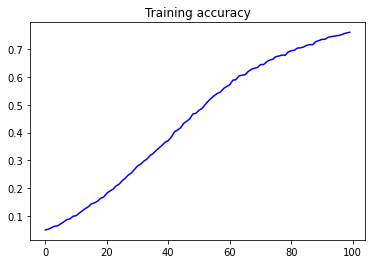

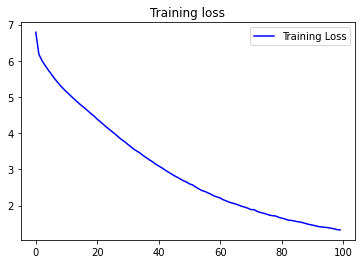

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [22]:
warnings.filterwarnings('ignore')
seed_text = input('Please write a few words to let it extend lyrics :')
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    if len((seed_text).split(' ')) % 5 == 0:
        seed_text += "\n"
           

print(seed_text)

Please write a few words to let it extend lyrics : sad man 


sad man  for the
 gates of eden new false
 to the roof fly away
 and the music and down
 he was a clean cut
 kid one say around your
 head love his bow got
 means to the rage whose
 stand up now the dean
 of women said her his
 very rage out behind me
 in the dean of women
 say and just i ain't
 i could gained 51 come
 on you rage like closed
 door down to the chair
 him up a fool around
 my head but easily ran
 behind me rage right toward
 the race said be joyful
 'go jeans beside


In [20]:
# model saved for deployment

model.save("bob_dylan.h5")

In [4]:
# all in one function for train a model for a new singer

def select_singer():
    ticker = input('Please write singer name in this lowercase characters with adding "-" between name and surname (exp: sezen-aksu)\n')

    url = 'https://sarki.alternatifim.com/sarkici/'


    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
         'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
         'Referer': 'https://cssspritegenerator.com',
         'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
         'Accept-Encoding': 'none',
         'Accept-Language': 'en-US,en;q=0.8',
         'Connection': 'keep-alive'}


    w_url = url + ticker

    response = urlopen(Request(url = w_url, headers=hdr))
    lyric_table = BeautifulSoup(response, 'html')
    song_names = []
    
    for row in lyric_table.findAll('li'):
        if row.a is None:  
            print('Input is wrong!')
            return
        else:
            song_names.append(unidecode(row.a.text))

    if len(song_names) < 5:
        print('Not enough song to analyse')
        return

    for idx,name in enumerate(song_names):
        song_names[idx] = re.sub(r'\W+',  "-", name.lower())
        if song_names[idx].endswith('-'):
            song_names[idx] = song_names[idx][:-1]  
    if len(ticker.split('-')) >1:
        print('Analysed', str(ticker).split('-')[0].upper(), str(ticker).split('-')[1].upper(), 'songs : ')  
    else: 
        print('Analysed', str(ticker).split('-')[0].upper(), 'songs : ')  
        
    for song in song_names:
        print(song)

    all_lyrics = []


    for songname in song_names:
        w_url = url + ticker + '/' + songname
        response = urlopen(Request(url = w_url, headers=hdr))
        lyric = BeautifulSoup(response, 'html')
        lyr = []

        for div in lyric.findAll('br'):
            lyr.append(div.next_sibling)

        lyr = [l for l in lyr if not str(l).startswith('\n') and not str(l).startswith('<div') and l != None and 'href=' not in str(l)]
        lyr = [str(l).split('\n')[0] for l in lyr]
        if len(lyr) > 2:
            lyr = [l.strip().lower() for l in lyr]
            for l in lyr:
                all_lyrics.append(l)
    print('\n')
    print("First 20 lines of lyrics :")
    for i in range(0,20):
        print(all_lyrics[i])   

    print('\n')
    print('Total length of lyrics', len(all_lyrics))
    # Tokenizing lyrics 
    tokenizer = Tokenizer()

    tokenizer.fit_on_texts(all_lyrics)
    total_words = len(tokenizer.word_index) + 1

    # create input sequences using list of tokens
    input_sequences = []
    for line in all_lyrics:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)


    # pad sequences 
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    # create predictors and label
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

    label = ku.to_categorical(label, num_classes=total_words)
    
    print('lyrics gathered and cleaned, now its time for model development!')
    #model development
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150, return_sequences = True)))
    model.add(Dropout(0.2))
    model.add(LSTM(100,activation="tanh"))
    model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())

    #model training
    history = model.fit(predictors, label, epochs=100, verbose=0)    
    
    print('Model is Ready to predict!')
    
    seed_text = input('Write a few words to let it extend lyrics : ')
    next_words = 100

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
        if len((seed_text).split(' ')) % 5 == 0:
            seed_text += "\n"


    print(seed_text)